<a href="https://colab.research.google.com/github/dami163/Assignment-3/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Convert data to float32 and normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split training data into training and validation sets
val_split = 0.2
val_samples = int(len(x_train) * val_split)

val_images = x_train[:val_samples]
val_labels = y_train[:val_samples]

x_train = x_train[val_samples:]
y_train = y_train[val_samples:]

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Print model summary
print(model.summary())

# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_data=(val_images, val_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy =', test_accuracy)


170498071/170498071 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                       

In [ ]:
# Predict on test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate train accuracy
train_accuracy = np.max(history.history['accuracy'])
print("Train Accuracy:", train_accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

313/313 [==============================] - 4s 12ms/step
Train Accuracy: 0.8288499712944031
Confusion Matrix:
 [[759  14  72  24  30   7   6  19  35  34]
 [ 43 726  13  16   7  11  20   8  19 137]
 [ 57   3 634  65  85  60  42  39   6   9]
 [ 29   2  73 505  65 200  63  42  10  11]
 [ 23   2  66  84 651  42  54  72   4   2]
 [ 12   1  50 187  41 623  19  55   3   9]
 [  8   2  65  93  46  47 728   4   5   2]
 [ 15   2  42  45  70  75   4 738   2   7]
 [146  28  23  24  11   8   5  14 709  32]
 [ 54  55  15  18   9  14  10  24  18 783]]
Precision: 0.6954327292895612
Recall: 0.6856


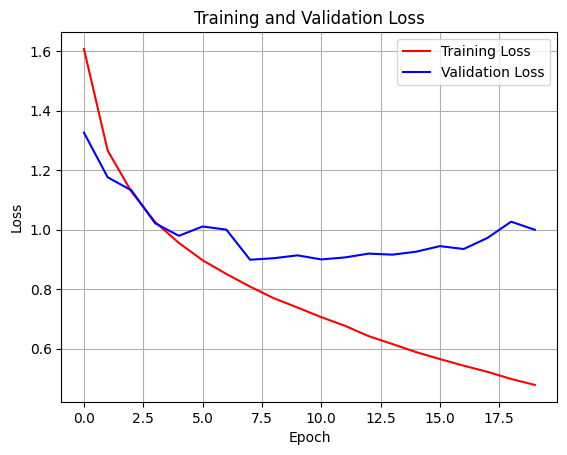

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], 'r-', label='Training Loss')
plt.plot(history.history['val_loss'], 'b-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

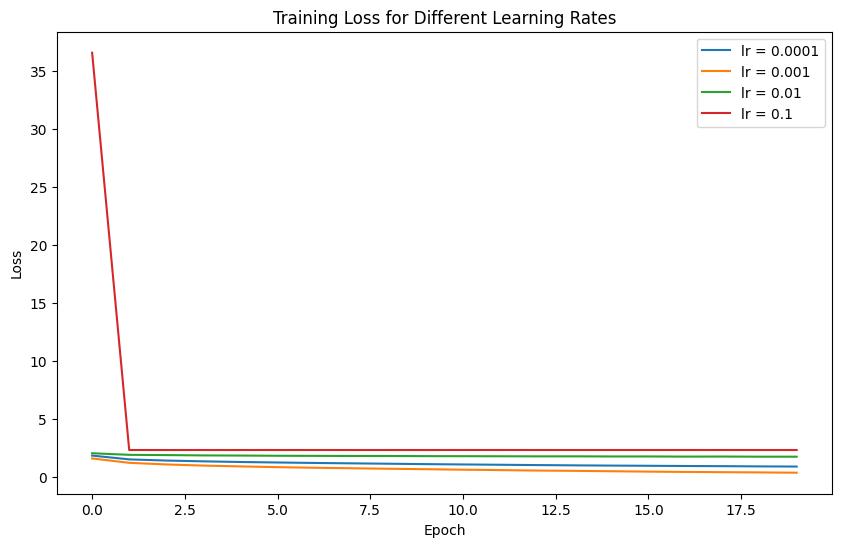

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
train_images, test_images = train_images.astype('float32') / 255.0, test_images.astype('float32') / 255.0

# Define learning rates to test
learning_rates = [0.0001, 0.001, 0.01, 0.1]

# Lists to store training history for each learning rate
histories = []

for lr in learning_rates:
    # Build the CNN model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10)
    ])

    # Compile the model with current learning rate
    model.compile(optimizer=keras.optimizers.Adam(lr),
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2, verbose=0)
    histories.append(history)

# Plot training and validation loss for each learning rate
plt.figure(figsize=(10, 6))
for lr, history in zip(learning_rates, histories):
    plt.plot(history.history['loss'], label='lr = ' + str(lr))
plt.title('Training Loss for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()